## ECOMMERCE WEBSCRAPPING PROJECT USING PYTHON AND MACHINE LEARNING: 

In [36]:
# I have used Amazon's web scapped data to for analysis for April 2025 data, which includes product prices, reviews, and ratings of phones under 20,000 INR.
# The dataset contains information on various phone models, including their specifications, customer feedback, and pricing details.
# the data is primarily focused on consumer electronics, providing insights into market trends and customer preferences.
# Additionally, I have implemented machine learning algorithms to Train my model for best accuracy . 
# The project involves data cleaning, feature engineering, and model evaluation to ensure robust predictions.


In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [38]:
df = pd.read_csv("webscrappeddata.csv")

In [39]:
df.head()

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,Samsung,Galaxy M35 5G,8GB,128GB,4.1,4000,18499,25999,0.29
1,Samsung,Galaxy S25 Ultra 5G,12GB,1TB,4.1,500000,159999,165999,0.04
2,iQOO,Neo 10R 5G,8GB,256GB,4.4,5000,28998,33999,0.15
3,Nothing,Phone 2a 5G,8GB,128GB,4.3,1000,19075,25999,0.27
4,iQOO,Z9s 5G,8GB,128GB,4.3,5000,19999,25999,0.23


In [ ]:
# checking the null values in the dataset
df.isnull().sum()

Brand                    0
Model                    0
RAM                      0
Storage                  0
Rating (out of 5)        2
Amount Sold              0
Price                    0
Price before Discount    0
Discount                 0
dtype: int64

In [41]:
# filling missing values 
from sklearn.impute import SimpleImputer
si = SimpleImputer()

In [42]:
df['Rating (out of 5)'] = si.fit_transform(df[['Rating (out of 5)']])

In [43]:
df.head()

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,Samsung,Galaxy M35 5G,8GB,128GB,4.1,4000,18499,25999,0.29
1,Samsung,Galaxy S25 Ultra 5G,12GB,1TB,4.1,500000,159999,165999,0.04
2,iQOO,Neo 10R 5G,8GB,256GB,4.4,5000,28998,33999,0.15
3,Nothing,Phone 2a 5G,8GB,128GB,4.3,1000,19075,25999,0.27
4,iQOO,Z9s 5G,8GB,128GB,4.3,5000,19999,25999,0.23


In [44]:
df.isnull().sum()

Brand                    0
Model                    0
RAM                      0
Storage                  0
Rating (out of 5)        0
Amount Sold              0
Price                    0
Price before Discount    0
Discount                 0
dtype: int64

## DATA VISUALIZATION AND INSIGHTS:

##  Most Popular Phone  brands based on Rating


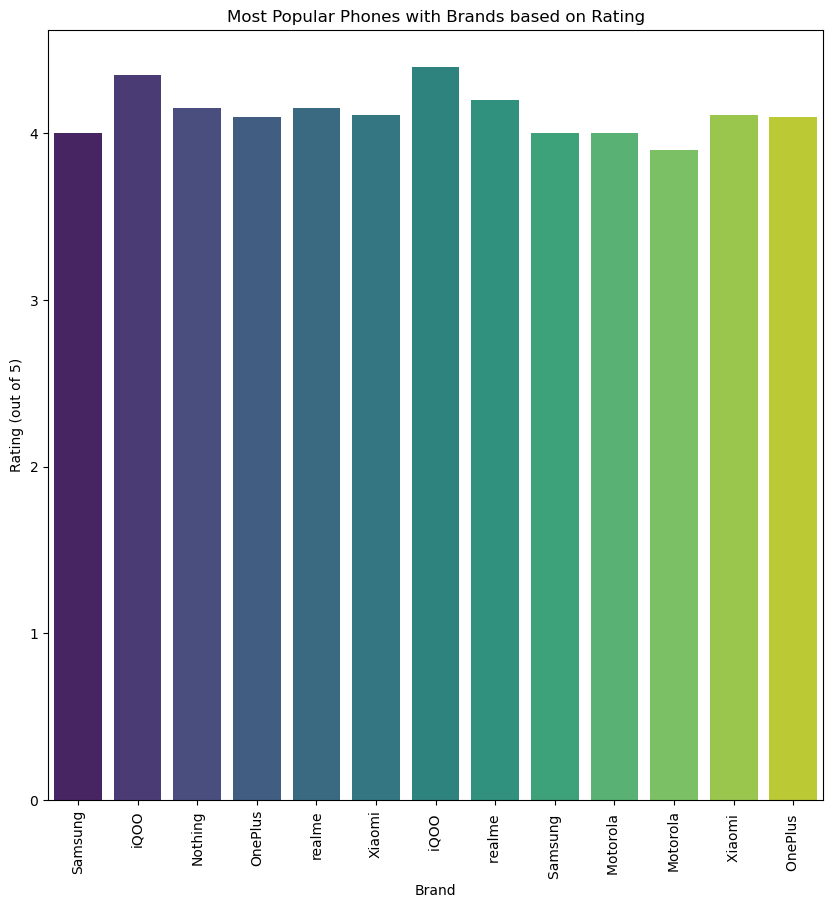

In [45]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Brand', y='Rating (out of 5)', data=df, estimator=np.mean, errorbar=None, 
            hue = 'Brand', 
            palette='viridis',
            legend=False)
plt.title('Most Popular Phones with Brands based on Rating')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Rating (out of 5)')
plt.show()

# Best phone Brand based on rating is : iqoo 


## Top Brands by Total Units Sold


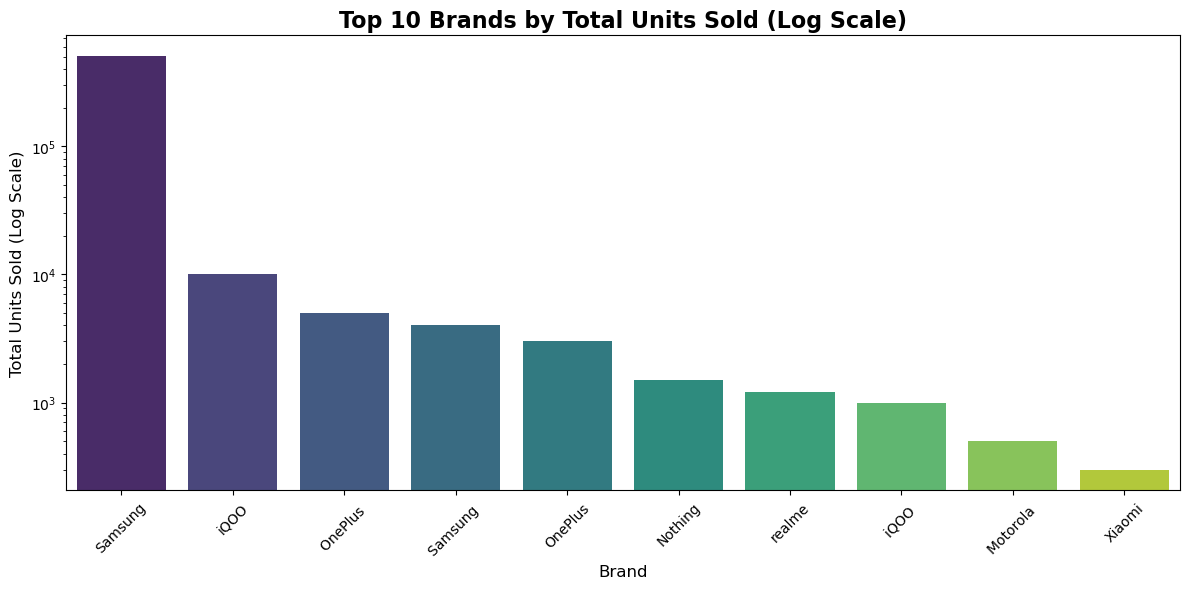

In [ ]:
brand_totals = df.groupby('Brand')['Amount Sold'].sum().sort_values(ascending=False).reset_index()

top_n = 10
top_brands = brand_totals.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Brand',
    y='Amount Sold',
    data=top_brands,
    palette='viridis',
    hue = 'Brand'
)

plt.yscale('log')  
plt.title(f'Top {top_n} Brands by Total Units Sold (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Units Sold (Log Scale)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# most units sold is : Samsung 
# followed by iqoo and realme 

## Top 5 Best Rated Phones 

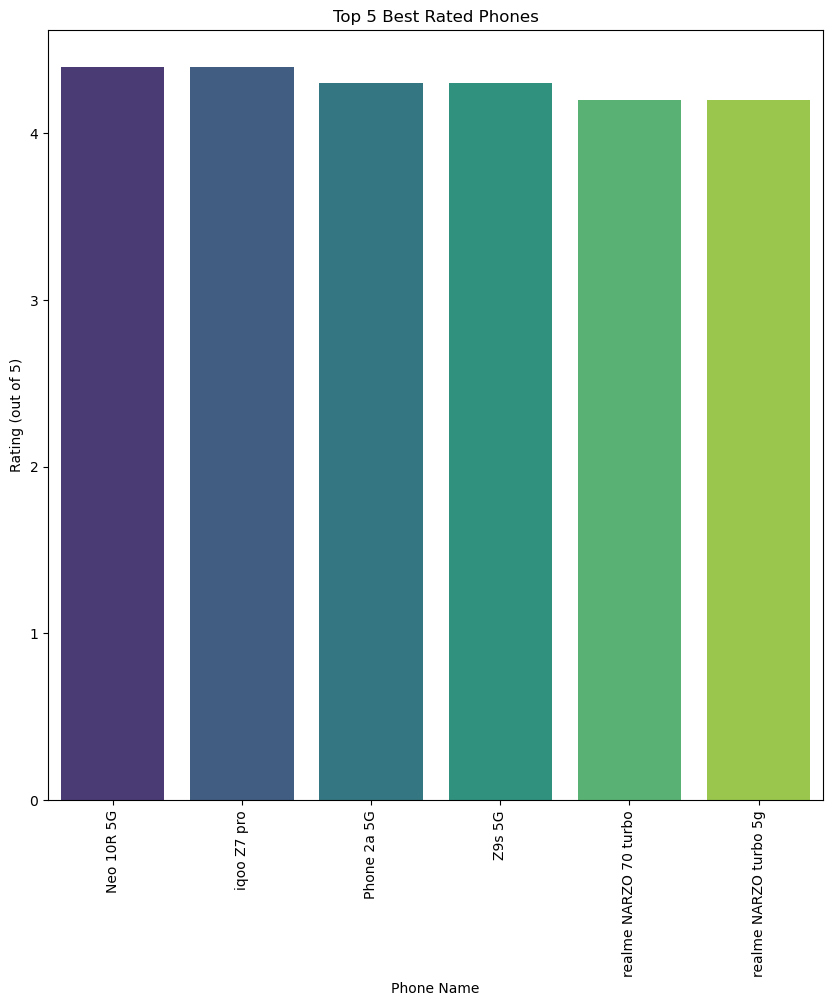

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(
    x='Model', 
    y='Rating (out of 5)', 
    data=df.nlargest(5, 'Rating (out of 5)', keep='all'), 
    hue='Model',  
    palette='viridis', 
    legend=False  
)
plt.title('Top 5 Best Rated Phones')
plt.xticks(rotation=90)
plt.xlabel('Phone Name')
plt.ylabel('Rating (out of 5)')
plt.show()

# Best rated phone is : iqoo Z7 Pro 5G with 4.4 rating

## 📈 Correlation Insights

## Sales & Price 

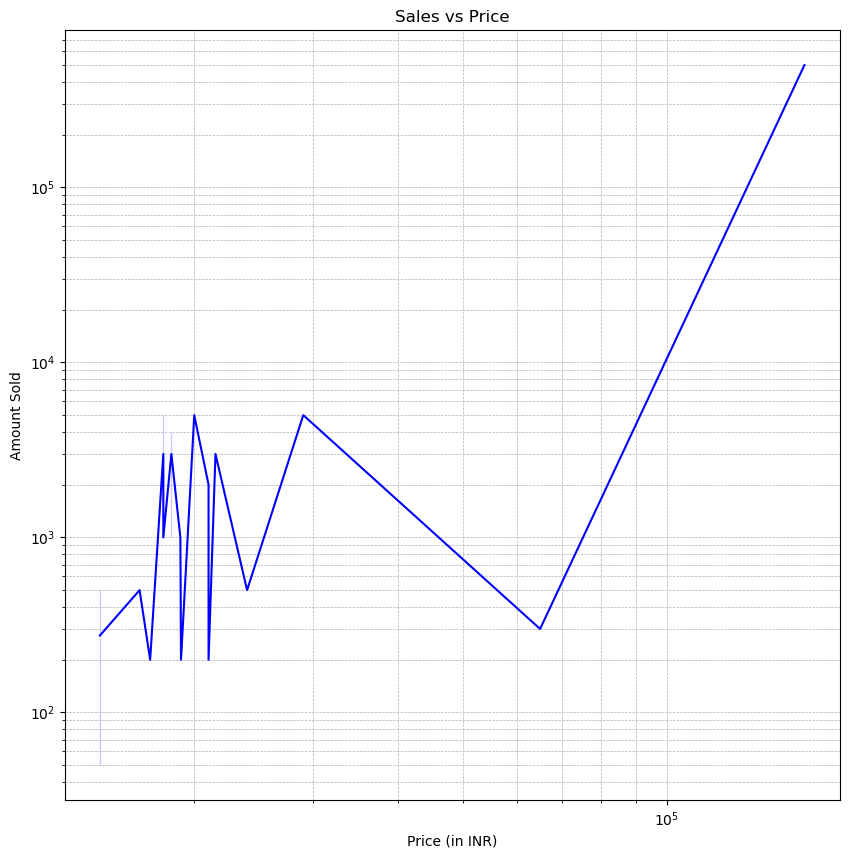

In [48]:
# Sales & Price: Strong positive correlation (0.90): 
plt.figure(figsize=(10, 10))
sns.lineplot(x='Price', y='Amount Sold', data=df, color='blue')
plt.title('Sales vs Price')
plt.xlabel('Price (in INR)')
plt.ylabel('Amount Sold')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# higher-priced phones tend to sell more, possibly due to brand reputation or hype.


## Discount & Sales

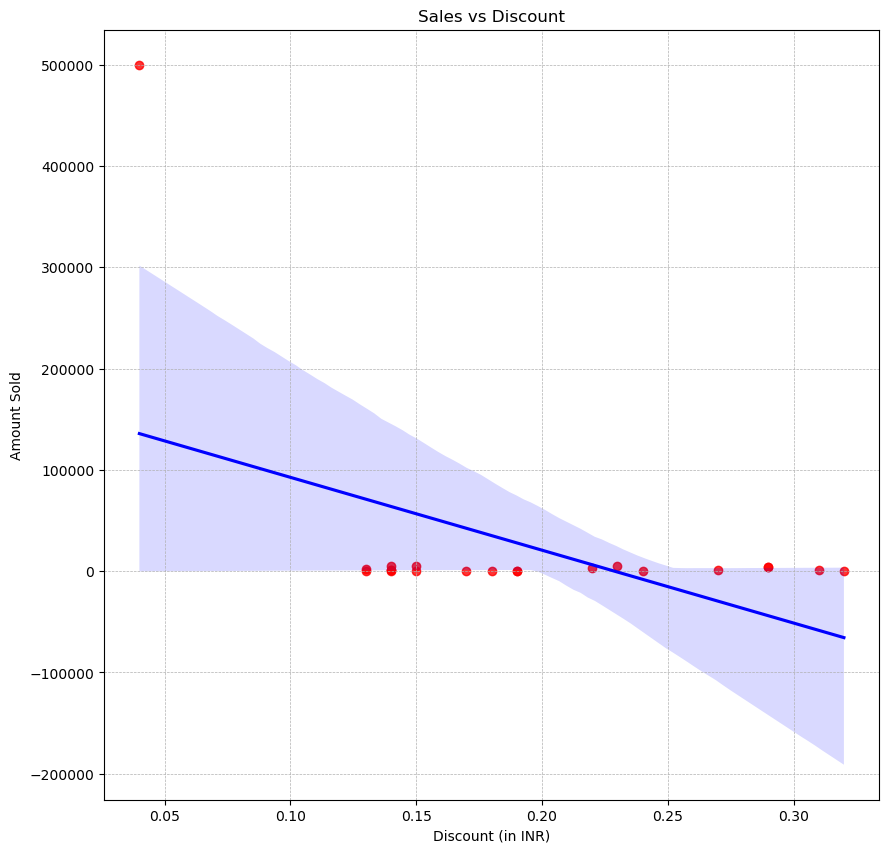

In [49]:
plt.figure(figsize=(10, 10))
sns.regplot(x='Discount', y='Amount Sold', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Sales vs Discount')
plt.xlabel('Discount (in INR)')
plt.ylabel('Amount Sold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Heavier discounts don't always lead to more sales.
Discount & Sales: Moderate negative correlation (-0.48) 


## Rating has minimal Corelation with Sales:

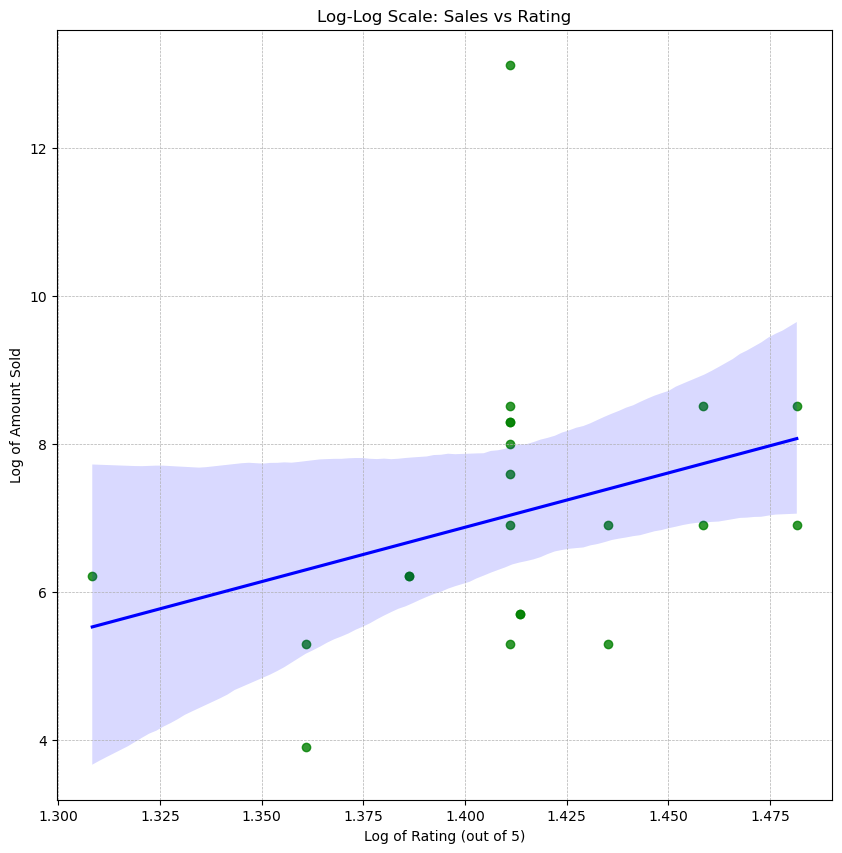

In [50]:
plt.figure(figsize=(10, 10))
sns.regplot(x=np.log(df['Rating (out of 5)']), y=np.log(df['Amount Sold']), data=df, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})
plt.title('Log-Log Scale: Sales vs Rating')
plt.xlabel('Log of Rating (out of 5)')
plt.ylabel('Log of Amount Sold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# The log-log scale plot shows a strong positive correlation between sales and ratings, indicating that higher-rated phones tend to sell more units.


Rating has minimal correlation with sales (near 0)
— customers may not heavily rely on ratings alone

# Rating has minimal correlation with sales (near 0)
customers may not heavily rely on ratings alone

# Best Value Phones: Pie Chart
# Phones with high ratings and low prices.

In [51]:
import plotly.express as px

fig = px.pie(
    df.nlargest(10, 'Rating (out of 5)', keep='all'),
    values='Price', 
    names='Model', 
    title='Best Value Phones by Price', 
    hover_data=['Price'], 
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_traces(textinfo='percent+label', hovertemplate='Model: %{label}<br>Price: %{value}')
fig.show()

# Average Discount By Price Segment

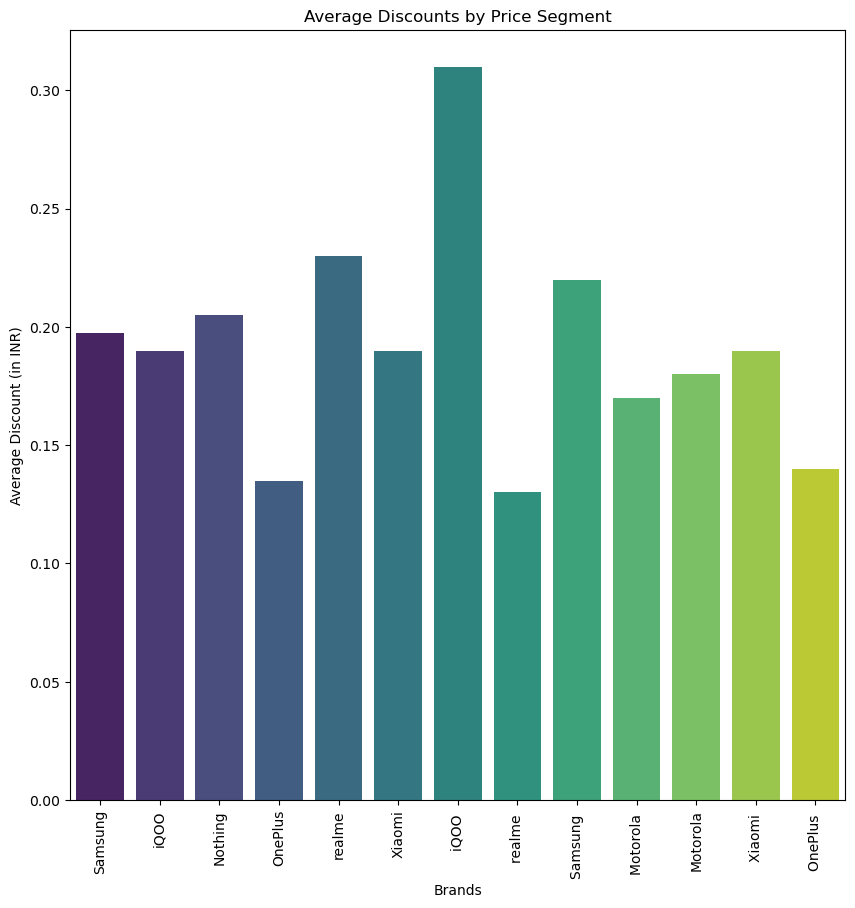

In [52]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Brand', y='Discount', data=df, estimator=np.mean, errorbar=None, palette='viridis' , hue='Brand')
plt.title('Average Discounts by Price Segment')
plt.xticks(rotation=90)
plt.xlabel('Brands')
plt.ylabel('Average Discount (in INR)')
plt.show()

# Total Units Sold by Price Segment

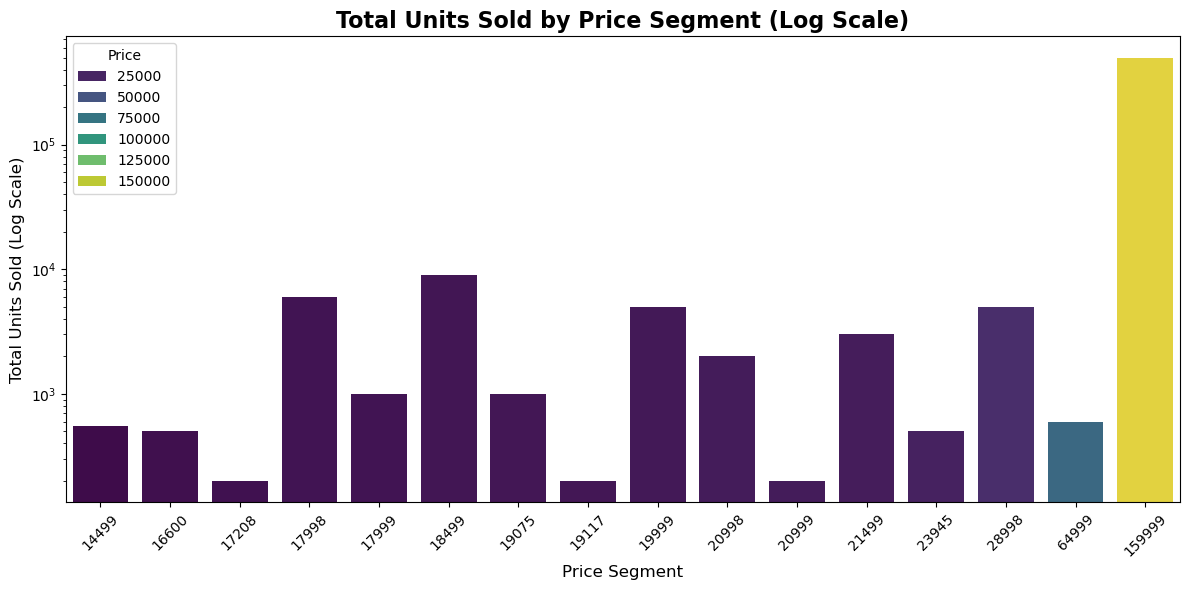

In [53]:
grouped = df.groupby('Price')['Amount Sold'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Price',
    y='Amount Sold',
    data=grouped,
    palette='viridis',
    hue = 'Price'
)

plt.yscale('log')  
plt.title('Total Units Sold by Price Segment (Log Scale)', fontsize=16, weight='bold')
plt.xlabel('Price Segment', fontsize=12)
plt.ylabel('Total Units Sold (Log Scale)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Phone Price Segmentation : 
# Categorize phones into: Budget (< ₹20,000), Mid-Range (₹20,000–₹50,000) ,Premium (> ₹50,000)

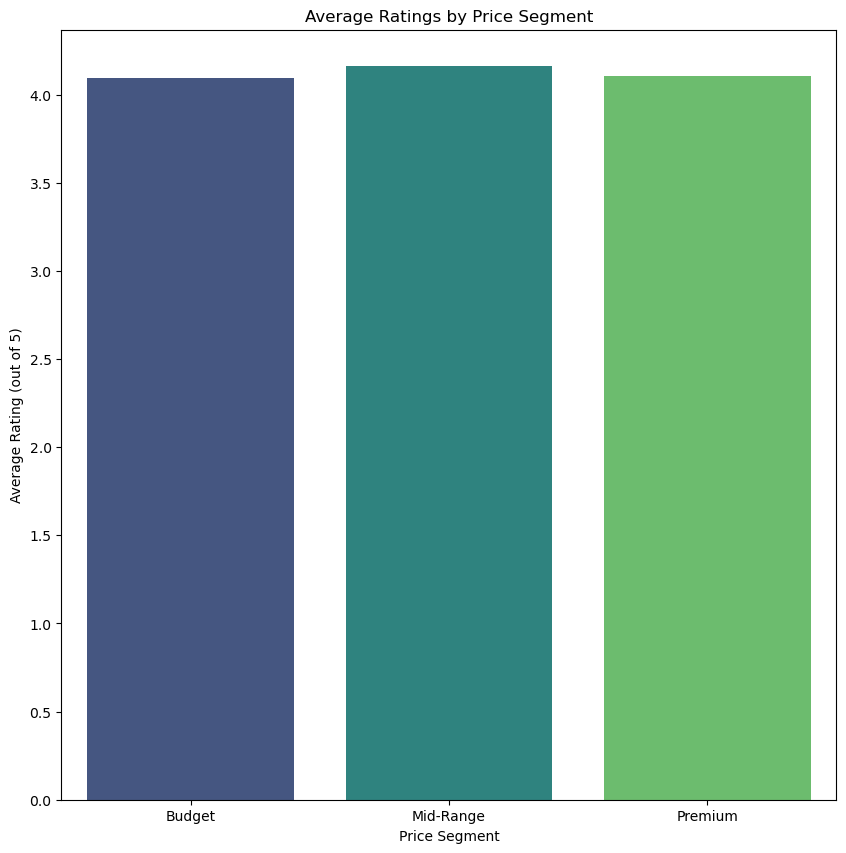

In [54]:
# Price Segment Analysis
df['Price Segment'] = pd.cut(df['Price'], bins=[0, 20000, 50000, float('inf')], labels=['Budget', 'Mid-Range', 'Premium'])


# 📊 Data Analysis
# Ratings by Price Segment
plt.figure(figsize=(10, 10))
sns.barplot(x='Price Segment', y='Rating (out of 5)', data=df, estimator=np.mean, errorbar=None, palette='viridis', hue='Price Segment')
plt.title('Average Ratings by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Average Rating (out of 5)')
plt.show()


# Brand Performance Summary Table

In [55]:
# We can build a summary for each brand:

brand_summary = df.groupby('Brand').agg(
    Avg_Rating=('Rating (out of 5)', 'mean'),
    Total_Sold=('Amount Sold', 'sum'),
    Avg_Price=('Price', 'mean'),
    Avg_Discount=('Discount', 'mean')
).reset_index()
brand_summary = brand_summary.sort_values(by='Total_Sold', ascending=False)
brand_summary.reset_index(drop=True, inplace=True)
brand_summary.head(10)



,Brand,Avg_Rating,Total_Sold,Avg_Price,Avg_Discount
0,Samsung,4.000000,507500,53624.0,0.1975
1,iQOO,4.350000,10000,24498.5,0.1900
2,OnePlus,4.100000,5000,17998.0,0.1400
3,Samsung,4.000000,4050,16499.0,0.2200
4,OnePlus,4.100000,3000,19498.0,0.1350
5,Nothing,4.150000,1500,21510.0,0.2050
6,realme,4.150000,1200,18558.0,0.2300
7,iQOO,4.400000,1000,18499.0,0.3100
8,Motorola,4.000000,500,16600.0,0.1700
9,Xiaomi,4.110526,300,64999.0,0.1900


## Model Processing 

In [56]:
df = pd.read_csv("webscrappeddata.csv")
df.head()

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,Samsung,Galaxy M35 5G,8GB,128GB,4.1,4000,18499,25999,0.29
1,Samsung,Galaxy S25 Ultra 5G,12GB,1TB,4.1,500000,159999,165999,0.04
2,iQOO,Neo 10R 5G,8GB,256GB,4.4,5000,28998,33999,0.15
3,Nothing,Phone 2a 5G,8GB,128GB,4.3,1000,19075,25999,0.27
4,iQOO,Z9s 5G,8GB,128GB,4.3,5000,19999,25999,0.23


In [57]:
# Check data for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [58]:
df.head()

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,Samsung,Galaxy M35 5G,8GB,128GB,4.1,4000,18499,25999,0.29
1,Samsung,Galaxy S25 Ultra 5G,12GB,1TB,4.1,500000,159999,165999,0.04
2,iQOO,Neo 10R 5G,8GB,256GB,4.4,5000,28998,33999,0.15
3,Nothing,Phone 2a 5G,8GB,128GB,4.3,1000,19075,25999,0.27
4,iQOO,Z9s 5G,8GB,128GB,4.3,5000,19999,25999,0.23


In [59]:
# Now we have Some Categorical columns in our dataset so we will encode them using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [60]:
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])

In [61]:
# convert Price and Price before discount to numeric values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price before Discount'] = pd.to_numeric(df['Price before Discount'], errors='coerce')

In [62]:
df.head()

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,5,2,8GB,128GB,4.1,4000,18499,25999,0.29
1,5,3,12GB,1TB,4.1,500000,159999,165999,0.04
2,9,7,8GB,256GB,4.4,5000,28998,33999,0.15
3,2,11,8GB,128GB,4.3,1000,19075,25999,0.27
4,9,13,8GB,128GB,4.3,5000,19999,25999,0.23


In [63]:
# Convert 'Storage' to gigabytes and then to integers
df['Storage'] = df['Storage'].str.replace('GB', '').str.replace('TB', '*1024').map(eval).astype(int)

# Convert 'RAM' to integers after removing 'GB'
df['RAM'] = df['RAM'].str.replace('GB', '').astype(int)


## Removing Outliers

In [64]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Example: Clean 'Amount Sold'
df_cleaned = remove_outliers_iqr(df, 'Amount Sold')


In [65]:
df_cleaned.head(10)

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,5,2,8,128,4.1,4000,18499,25999,0.29
2,9,7,8,256,4.4,5000,28998,33999,0.15
3,2,11,8,128,4.3,1000,19075,25999,0.27
4,9,13,8,128,4.3,5000,19999,25999,0.23
5,5,2,8,256,4.1,3000,21499,27499,0.22
6,3,8,8,128,4.1,1000,17998,20999,0.14
7,2,10,8,128,4.0,500,23945,27999,0.14
8,3,8,8,256,4.1,2000,20998,23999,0.13
9,11,0,8,256,4.1,200,19117,27999,0.32
10,5,1,8,128,3.7,500,14499,18999,0.24


In [66]:
df['Discount'] = df['Discount']*100

In [67]:
df.head(10)

,Brand,Model,RAM,Storage,Rating (out of 5),Amount Sold,Price,Price before Discount,Discount
0,5,2,8,128,4.1,4000,18499,25999,29.0
1,5,3,12,1024,4.1,500000,159999,165999,4.0
2,9,7,8,256,4.4,5000,28998,33999,15.0
3,2,11,8,128,4.3,1000,19075,25999,27.0
4,9,13,8,128,4.3,5000,19999,25999,23.0
5,5,2,8,256,4.1,3000,21499,27499,22.0
6,3,8,8,128,4.1,1000,17998,20999,14.0
7,2,10,8,128,4.0,500,23945,27999,14.0
8,3,8,8,256,4.1,2000,20998,23999,13.0
9,11,0,8,256,4.1,200,19117,27999,32.0


## Splitting the data into training and testing sets

In [68]:
from sklearn.model_selection import train_test_split

X = df[['Brand', 'Price', 'Discount', 'Rating (out of 5)', 'Discount']]
y = df['Amount Sold']

# Optional: log transform target
y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Accuracy of the Model :

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score before tuning: {r2:.4f}")


R^2 Score before tuning: 0.1883


## Accuracy of the Model After Hyperparameter Tuning

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
print("Best Params for our model :", grid_search.best_params_)
print("R2 Score After tuning:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best Params for our model : {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
R2 Score After tuning: 0.1424128643094339
RMSE: 2.3600743559845045
